# Support Vector Regression


In [3]:
import pandas as pd

df = pd.read_csv('dataset2.csv')

In [4]:
X = df.drop('count', axis=1) 
y = df['count']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(svr_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
y_pred = grid_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R2 score:', r2)
print('Root mean squared error:', rmse)


Best hyperparameters: {'C': 10, 'gamma': 0.001}
Best score: 0.8982055548485368
Mean squared error: 1902.9139764096901
Mean absolute error: 8.8789064881221
R2 score: 0.9156118286883991
Root mean squared error: 43.62240223107492


In [8]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create the SVR model
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.001, epsilon=.1)

# Fit the model to the training data
svr_rbf.fit(X_train, y_train)


y_pred = svr_rbf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', mae)

r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

rmse = np.sqrt(mse)
print('Root mean squared error:', rmse)


Mean squared error: 1902.9139764096901
Mean absolute error: 8.8789064881221
R2 score: 0.9156118286883991
Root mean squared error: 43.62240223107492


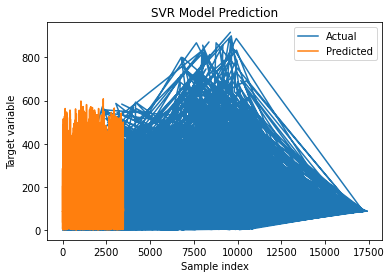

In [9]:
import matplotlib.pyplot as plt

# Plot the predicted values and actual values of the target variable
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title to the plot
plt.xlabel('Sample index')
plt.ylabel('Target variable')
plt.title('SVR Model Prediction')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()
